## Sprint 6 - Project Overview

As an analyst for Zuber, a new ride-sharing company that's launching in Chicago, my task is to find patterns in the available information. I want to understand passenger preferences and the impact of external factors on rides. Working with a database, I will analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

To complete this project and test a hypothesis about the impact of weather on ride frequency, I will work through the following steps - 
- **Step 1.** Open the data files and study the general information
- **Step 2.** Prepare the data
- **Step 3.** Analyze the data in a variety of ways
- **Step 4.** Test the following hypothesis
  - The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

## Exploratory Data Analysis

In addition to the original data, I retrieved in the previous tasks of this Sprint's project, I've been given these files -

**/datasets/project_sql_result_01.csv** 

*It contains the following data:*
  - **company_name** - taxi company name
  - **trips_amount** - the number of rides for each taxi company on November 15-16, 2017. 
      
**/datasets/project_sql_result_04.csv**

*It contains the following data:*
  - **dropoff_location_name** - Chicago neighborhoods where rides ended 
  - **average_trips** - the average number of rides that ended in each neighborhood in November 2017. 
  
**/datasets/project_sql_result_07.csv** contains data on rides from the Loop to O'Hare International Airport.

*It contains the following fields:*
  - **start_ts** - pickup date and time
  - **weather_conditions** - weather conditions at the moment the ride started 
  - **duration_seconds** - ride duration in seconds   

For these datasets, I will take the following steps - 
  - Import the files
  - Study the data they contain
  - Make sure the data types are correct
  - Identify the top 10 neighborhoods in terms of drop-offs
  - Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
  - Draw conclusions based on each graph and explain the results
  - Test the hypothesis

### Import Libraries

In [1]:
# Import libraries for EDA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from scipy import stats as st

### Read in Files

In [2]:
# Read in CSVs
trips = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')
ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

### Study Data Sets

#### Study Trips Data Set

In [3]:
# Check sample of df
trips.head()

# Check for missing values
trips.isna().sum()

# Check data types
trips.info()

# Describe df
trips.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


There aren't any changes needed to data types. There aren't any missing values.

#### Study Dropoff Data Set

In [4]:
# Check sample of df
dropoff.head()

# Check for missing values
dropoff.isna().sum()

# Check data types
dropoff.info()

# Describe df
dropoff.describe()

# Going to round up average_trips because trips should be an integer. You cannot have half a trip so will round up
dropoff['average_trips'] = np.ceil(dropoff['average_trips'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


There aren't any changes needed to data types. There aren't any missing values. I rounded up average trips to the next whole number because you cannot have a fraction of a trip. I understand that we are working with averages, but it makes more sense conceptualy when dealing with trip counts to not have floats.

#### Study O'hare Data Set

In [5]:
# Check sample of df
ohare.head()

# Check for missing values
ohare.isna().sum()

# Check data types
ohare.info()

# Describe df
ohare.describe()

# Convert seconds from float to int
ohare['duration_seconds'] = ohare['duration_seconds'].astype(int)

# Convert start_ts to datetime 
ohare['start_ts'] = pd.to_datetime(ohare['start_ts'])

# Create a column that extracts the day of the week from start_ts
ohare['day_of_week'] = ohare['start_ts'].dt.day_name()

# Check data type again to check successful conversion to int
ohare.info()

# Check sample again to view new columns 
ohare['day_of_week'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
 3   day_of_week         1068 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 33.5+ KB


array(['Saturday'], dtype=object)

Converting duration_seconds from float to integer because the field represents seconds as a whole number. There aren't any missing values. Added a field that extracts day of the week from date timestamp. Confirmed that all dates in this dataset are Saturdays. No need to filter to just Saturdays to test the hypotheses. 

### Create Visualizations With the Data

#### Taxi Companies and the Number of Rides

Because there are 64 taxi companies, I will just plot the top 10 taxi companies in terms of number of rides on November 15-16, 2017.

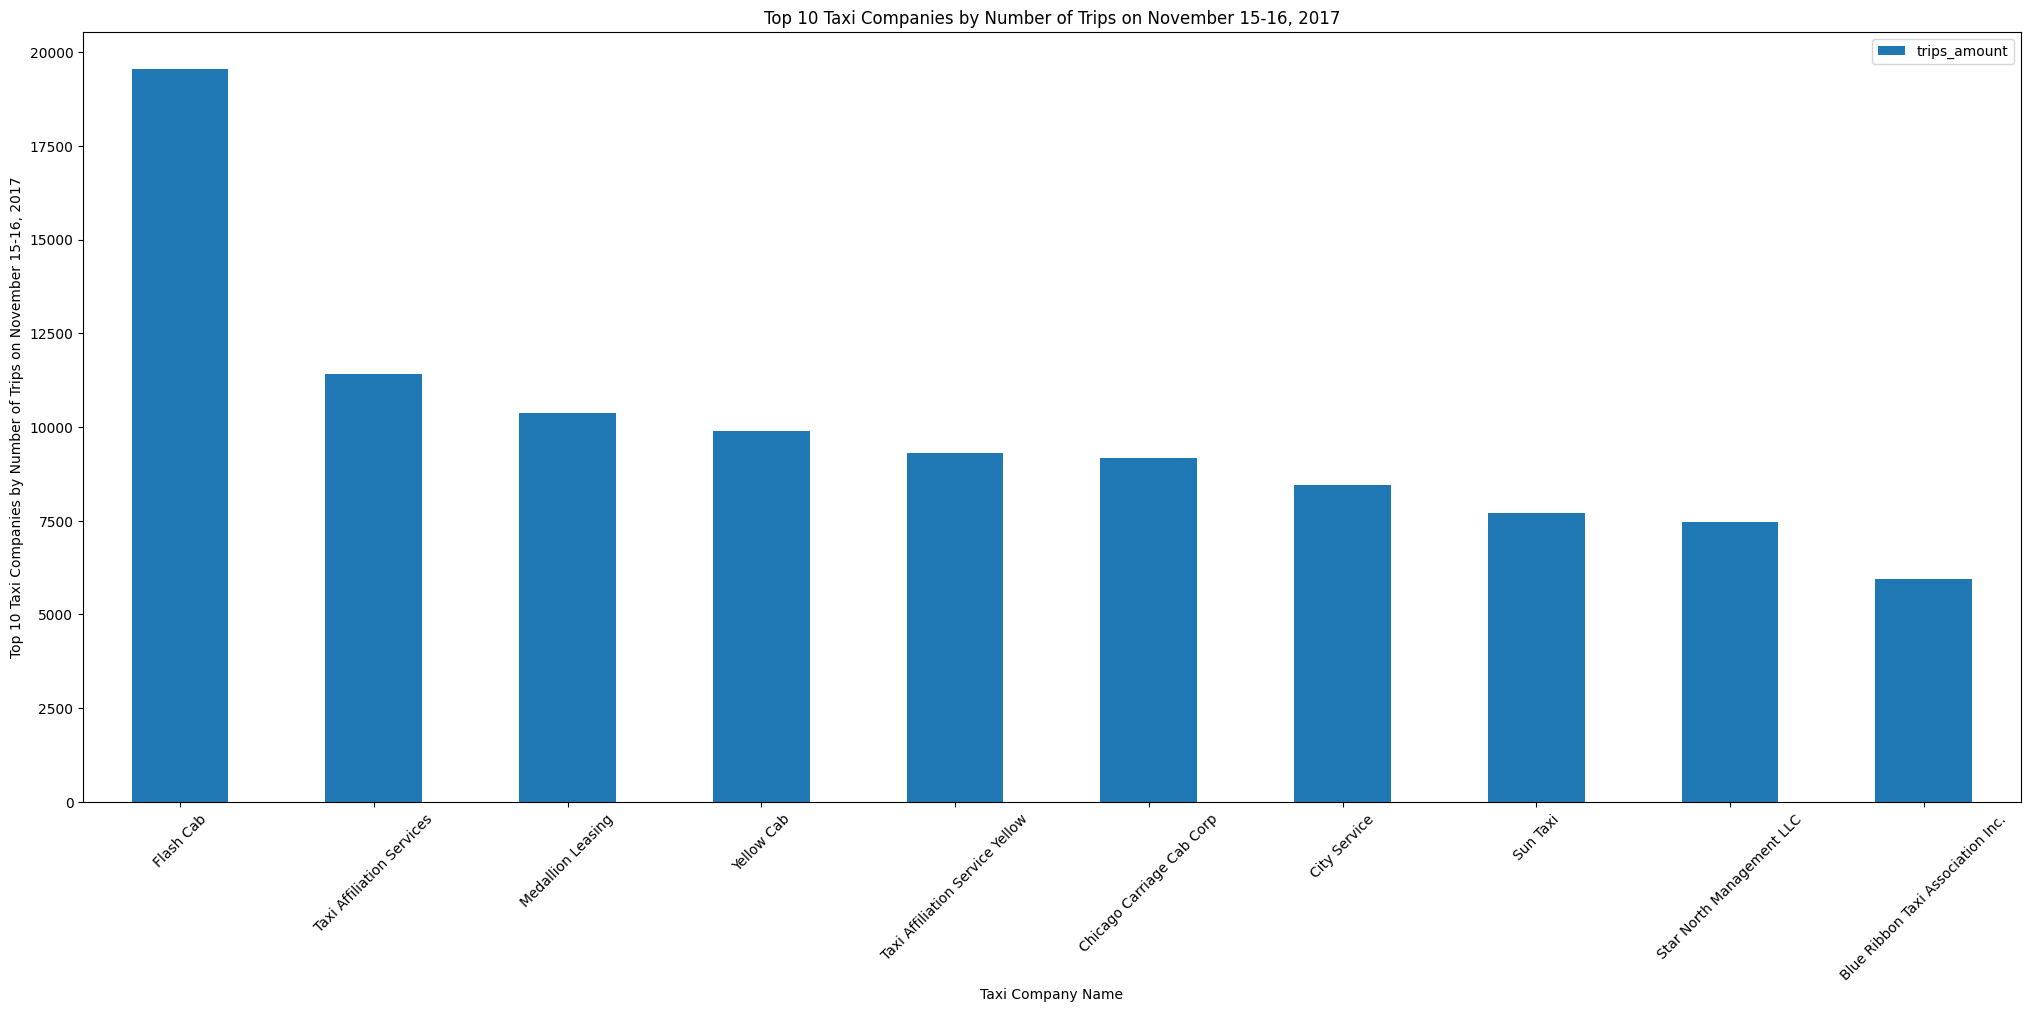

In [6]:
# Check for distinct company names
len(trips['company_name'].unique())

# Create dataframe of top 10 taxi comapnies by number of trips
top_ten_companies = trips.sort_values('trips_amount', ascending = False).head(10)

# Create a bar chart that shows the number of trips by dropoff location
top_ten_companies.plot(x = 'company_name'
                      , y = 'trips_amount'
                      , title = 'Top 10 Taxi Companies by Number of Trips on November 15-16, 2017'
                      , xlabel = 'Taxi Company Name'
                      , ylabel = 'Top 10 Taxi Companies by Number of Trips on November 15-16, 2017'
                      , kind = 'bar'
                      , rot = 45
                      , figsize=(25,10)
                      )

# Show bar chart
plt.show() 

Flash Cab had almost double the rides given on Nov 15 and 16, 2017. Flash Cab had 19,558 rides where as Taxi Affiliation Services had 11,422 trips.

#### Top 10 Neighborhoods by Number of Dropoffs

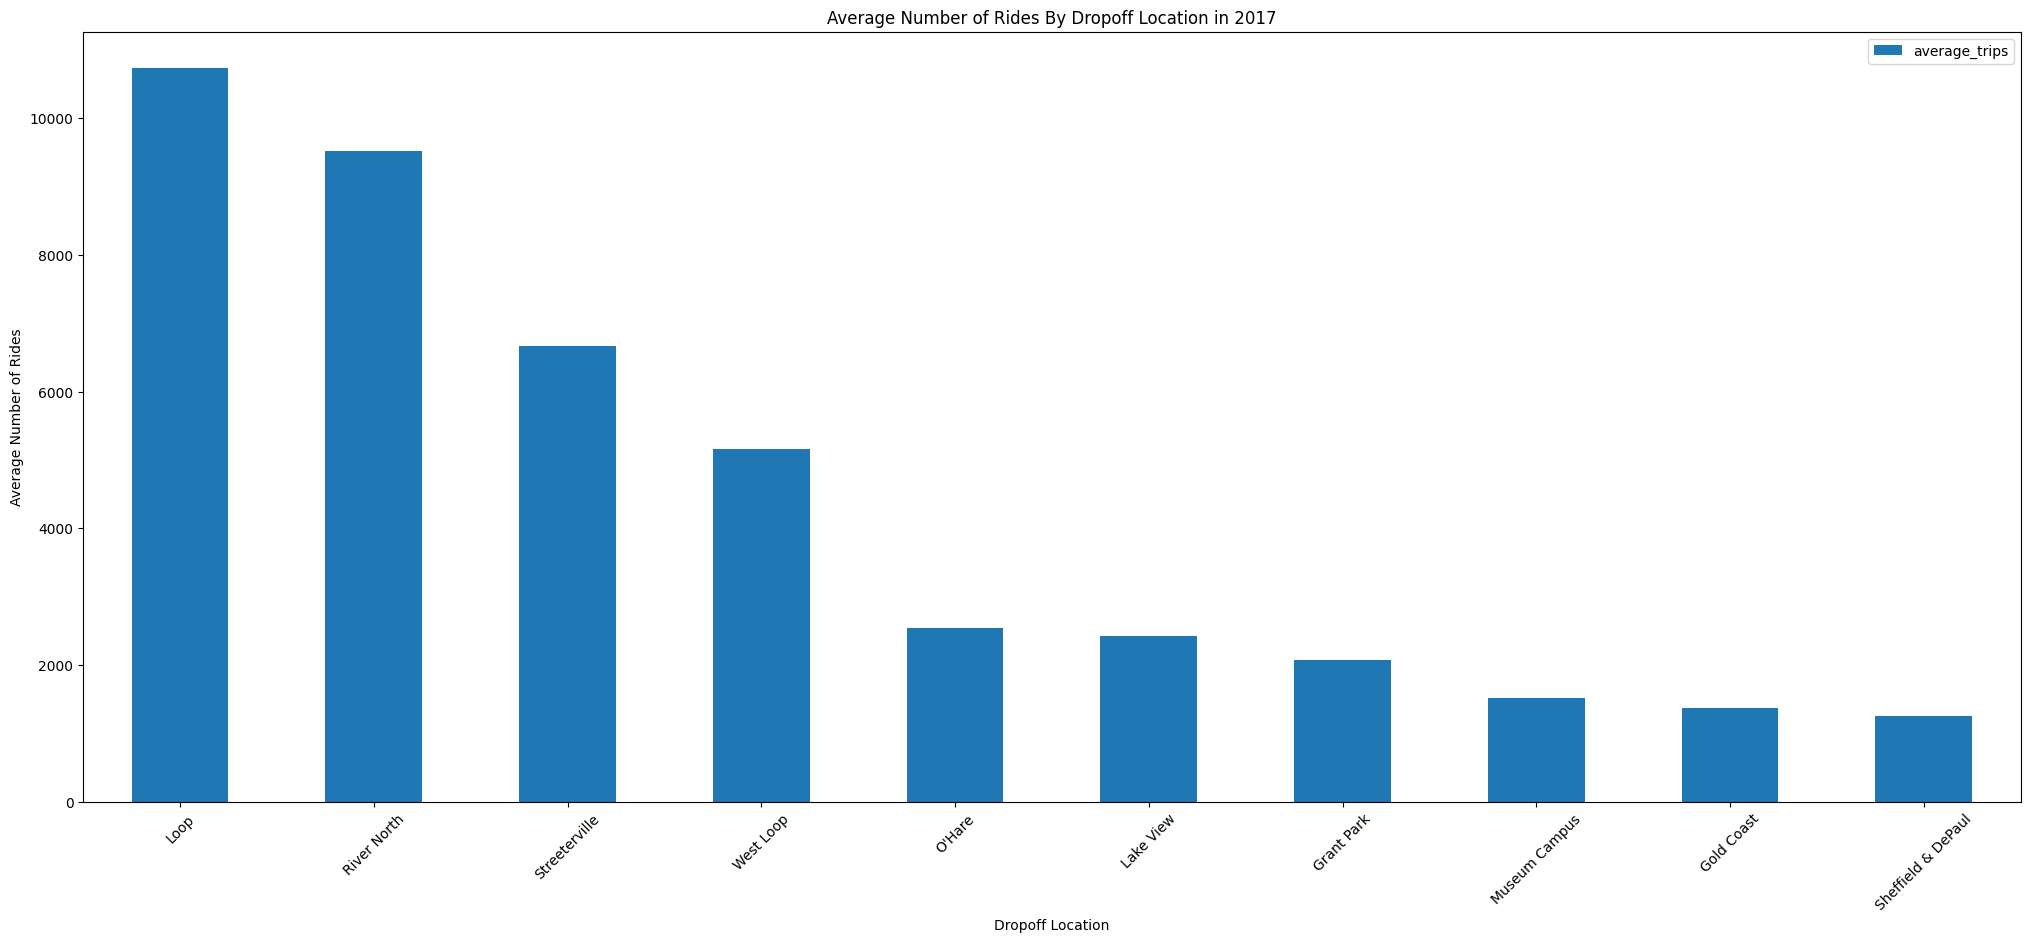

In [7]:
# Create dataframe of top 10 locations by average number of trips
top_ten_dropoffs = dropoff.sort_values('average_trips', ascending = False).head(10)

# Create a bar chart that shows the number of trips by dropoff location
top_ten_dropoffs.plot(x = 'dropoff_location_name'
                      , y = 'average_trips'
                      , title = 'Average Number of Rides By Dropoff Location in 2017'
                      , xlabel = 'Dropoff Location'
                      , ylabel = 'Average Number of Rides'
                      , kind = 'bar'
                      , rot = 45
                      , figsize=(25,10)
                      )

# Show bar chart
plt.show() 

The greatest number of rides ended in the Loop. The Loop, River North, Streeterville, and West Loop might be more populous neighborhoods compared to the other neighborhoods in Chicago that made it into the Top 10 dropoff locations. 

## Hypotheses Testing

For this section, I will test the following hypotheses - 
**"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."**

**In order to answer this question, I will need to complete the following steps -**
  - Create two data sets 
    1. One dataframe contains ride durations on Saturdays where the weather condition is bad
    2. One dataframe that contains ride durations on Saturdays where the weather condition is not bad
    
**Assumpitons**
  - Rainy days is designated by weather condition = Bad. Making this assumption because there isn't a field or value that explicitly denotes rain.
  

In [8]:
# Test the hypotheses

# Null Hypothesis - "There is no difference in the average ride duration from the Loop to O'Hare International Airport between rainy days Saturdays and non-rainy days Saturdays"
# Alternative Hypothesis - "There is a difference in the average ride duration from the Loop to O'Hare International Airport between rainy Saturdays and non-rainy Saturdays"

# Create a good and bad weather data set
bad_weather = ohare[ohare['weather_conditions'] == 'Bad']['duration_seconds']
good_weather = ohare[ohare['weather_conditions'] != 'Bad']['duration_seconds']

# Print the number of values in each list to see if there is a similiarly equal and large enough sample size
print('The number of rainy Saturday trips is:', len(bad_weather))
print('The number of non-rainy Saturday trips is:', len(good_weather))

print('')

print('The average duration for rainy trips on Saturday is',round(bad_weather.mean(),2))
print('The average duration for non-rainy trips on Saturday is',round(good_weather.mean(),2))

# critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis
alpha = 0.05  

# In order to test the hypothesis that the means of the two statistical populations are equal based on samples taken from them, apply the independent t-test 
results = st.ttest_ind(bad_weather, good_weather)

print('')

print('p-value: ', results.pvalue)

print('')

if results.pvalue < alpha:
    print("We reject the null hypothesis - There is a difference in the average ride duration from the Loop to O'Hare International Airport between rainy Saturdays and non-rainy Saturdays")
else:
    print("We can't reject the null hypothesis - There is no difference in the average ride duration from the Loop to O'Hare International Airport between rainy days Saturdays and non-rainy days Saturdays") 


The number of rainy Saturday trips is: 180
The number of non-rainy Saturday trips is: 888

The average duration for rainy trips on Saturday is 2427.21
The average duration for non-rainy trips on Saturday is 1999.68

p-value:  6.517970327099473e-12

We reject the null hypothesis - There is a difference in the average ride duration from the Loop to O'Hare International Airport between rainy Saturdays and non-rainy Saturdays


There is a statistically signficant difference in the average ride duration from the Loop to O'Hare International Airport between rainy and non-rainy Saturdays.

## Conclusion 

As an analyst for Zuber, a new ride-sharing company that's launching in Chicago, my task was to find patterns in the available information. I wanted to understand passenger preferences and the impact of external factors on rides. Below are some insights from our competitors data that I derived - 

- **Insight 1** - Flash Cab had almost double the rides given on Nov 15 and 16, 2017. Flash Cab had 19,558 rides where as Taxi Affiliation Services had 11,422 trips.
- **Insight 2** - The greatest number of rides ended in the Loop. The Loop, River North, Streeterville, and West Loop might be more populous neighborhoods compared to the other neighborhoods in Chicago that made it into the Top 10 dropoff locations.
- **Insight 3** - There is a statistically signficant difference in the average ride duration from the Loop to O'Hare International Airport between rainy and non-rainy Saturdays.